# CAP SAC Hackathon Workshop

Intro to Python  
by: Liz Fletcher

-----

#### Getting started

Let's assign some variables

In [35]:
var1 = 5
var2 = 3.14

We can do math to and with numbers and variables. The basic operations are:  

    z = x + y  # addition
    z = x - y  # subtraction
    z = x * y  # multiplication
    z = x / y  # division
    z = x // y # integer division
    z = x % y  # modulo (remainder)
    z = - x    # negation
    z = x ** y # exponentiation

We can also compare numbers and variables:

    x < y      # less than
    x > y      # greater than
    x <= y     # less than or equal to
    x >= y     # greater than or equal to
    x == y     # equal to
    x != y     # not equal to

In [36]:
print(5+3) # addition
print(var2 * -2) # multiplication
print(var1 - var2) # subtraction
print(5 > 3) # comparison
print(var2 == var1) # comparison

8
-6.28
1.8599999999999999
True
False


Note for the third line we're seeing the impacts of using floats - since only 16 decimal places are stored, sometimes the last digit will be off. This is not just a python thing, but a universal occurrence when using floats across all languages. It should not affect your results in any meaningful way, but is something to be mindful of.

---
Now, we'll import the numpy library which lets us array and matrix math. It also has lots of built in functions that might be useful for this problem

In [16]:
import numpy as np # import numpy and rename to np

Numpy has lots of operations, constants, and functions that might be useful for this problem:

In [42]:
print(np.abs(-5)) # absolute value
print(np.sqrt(9)) # square root
print(np.cos(np.pi)) # cos (and pi)
print(np.arcsin(1)) # arcsin
print(np.exp(3)) # exponential
print(np.log(np.e)) # natural logarithm (and e)

5
3.0
-1.0
1.5707963267948966
20.085536923187668
1.0


We can also use numpy to build arrays. We can define them manually:

In [38]:
vec1 = np.array([1,2,3,4,5,6,7,8,9,10])
print(vec1)

[ 1  2  3  4  5  6  7  8  9 10]


Or use functions like linspace, which creates a linearly spaced vector  
Syntax is (start, stop, number of elements)

In [39]:
vec2 = np.linspace(10,1,10)
print(vec2)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


We can do math with these vectors in the same way we did above

In [40]:
print(5*vec1) #'' multiply vec1 by 5
print(vec1+vec2) # add vec1 and vec2

[ 5 10 15 20 25 30 35 40 45 50]
[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]


We can access elements in the array and parts of the array  
Note: Python starts indexing at 0

In [41]:
print(vec1[0]) # get the first element
print(vec1[-1]) # get the last element
print(vec1[2:5]) # get elements 2-4 (ignore last index)
print(vec1[:4]) # get elements beginning to 3
print(vec1[8:]) # get elements 8 to end

1
10
[3 4 5]
[1 2 3 4]
[ 9 10]


Arrays can have more than one dimension (matrices)

In [43]:
mat1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(mat1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


You can access the elements in the same way as above. Indexing can be a bit confusing, so be careful and double check that the index you're using is the one you're really looking for!

In [44]:
print(mat1[0]) # first row
print(mat1[:,0]) # first column
print(mat1[1,2]) # element (2,1)

[1 2 3]
[1 4 7]
6


---
#### Now for some more complex stuff

Starting with a for loop. This will start with i=0 and increment by 1 until i=4, printing the value of i each time

In [45]:
for i in range(0,5):
    print(i)

0
1
2
3
4


Now, write a for loop with if/else statements:

In [46]:
for i in range(0,5):
    if i % 2 == 0:
        print("Even")
    else:
        print("Odd")

Even
Odd
Even
Odd
Even


Now, write a while loop. This starts with i=0, prints the value of i, and increments i by 1 each time while i is less than 5. It accomplishes the same thing as the for loop above.

In [47]:
i = 0
while i < 5:
    print(i)
    i += 1

0
1
2
3
4


---
#### Functions  
Let's get started with some functions. First, let's define a simple function that takes three inputs and adds them together.

In [2]:
def myFunction(p1,p2,p3): # function definition with three inputs
    temp = p1+p2+p3       # add the three inputs together and store in temp
    return temp           # return the value of temp as the function's output

And test it out

In [3]:
print(myFunction(1,2,3))
print(myFunction(14,-1,23))

6
36


---
#### An example (adapted from https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)

Now let's do something a bit more complicated - dealing with a differential equation.  
 
We're going to set up the equation of motion of the angle of a pendulum acted on by gravity and friction:  
$ \frac{\text{d}^2\theta}{\text{d}t^2} + \alpha \frac{\text{d}\theta}{\text{d}t} + \beta \sin(\theta(t)) = 0$
 
Which can be converted to a system of first order equations:  
$ \frac{\text{d}\theta}{\text{d}t} = \omega(t) $  
$ \frac{\text{d}\omega}{\text{d}t} = -\alpha\omega(t) - \beta \sin(\theta(t)) $

In [50]:
# start by importing an ODE solver
from scipy.integrate import odeint

# now implement our equations of motion
# here y is a vector of theta and omega
def pend(y,t,alpha,beta):
    theta, omega = y
    dydt = [omega, -alpha*omega - beta*np.sin(theta)]
    return dydt

# set up our parameters and initial conditions
alpha = 0.5
beta = 2*np.pi
y0 = np.array([3.0,0.0])
t = np.linspace(0,10,101)

# now solve using the ODE solver
sol = odeint(pend,y0,t,args=(alpha,beta))
# print the first few points
print(sol[:6])

[[ 3.          0.        ]
 [ 2.99561699 -0.08738733]
 [ 2.98248687 -0.17583717]
 [ 2.96023706 -0.27066442]
 [ 2.92796215 -0.37725826]
 [ 2.88420288 -0.50134688]]


The output here is a series of theta and omega values for each of our time points. Just looking at it is not very useful, so let's plot it! We will use the Pyplot plotting library.

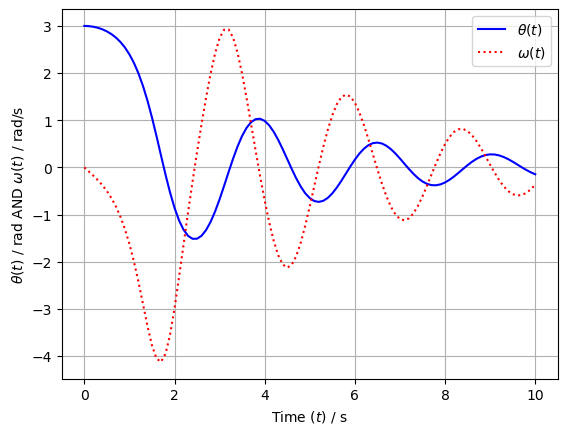

In [51]:
import matplotlib.pyplot as plt

# generate a new figure
f1 = plt.figure()
# plot theta(t) first
plt.plot(t,sol[:,0],'-b',label=r'$\theta(t)$') # theta is the first column, so access using [:,0]
# then plot omega(t)
plt.plot(t,sol[:,1],':r',label=r'$\omega(t)$') # omega is the second column, so access using [:,1]
# label our axes
# if you define a string as r'[string]' you can use LaTeX symbols
plt.xlabel(r'Time ($t$) / s')
plt.ylabel(r'$\theta(t)$ / rad AND $\omega(t)$ / rad/s')
# add a grid
plt.grid()
# and a legend
plt.legend()
# show the plot
plt.show()